<a href="https://colab.research.google.com/github/Shubham1420/credit-card-fraud-detection-using-different-ML-models/blob/main/topicmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Specify the path to the directory containing the datasets on your Google Drive
data_path = '/content/'

# Load ted_main.csv
ted_main_path = data_path + 'ted_main.csv'
ted_main_df = pd.read_csv(ted_main_path)

# Load transcripts.csv
transcripts_path = data_path + 'transcripts.csv'
transcripts_df = pd.read_csv(transcripts_path)

# Now you have ted_main_df and transcripts_df loaded with your datasets
# You can work with the data using pandas operations

# For example, to display the first few rows of ted_main_df and transcripts_df:
print("ted_main_df:")
print(ted_main_df.head())

print("\ntranscripts_df:")
print(transcripts_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ted_main_df:
   comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis       

#LDA

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess function
def preprocess_text(text):
    # Tokenize text into words
    words = word_tokenize(text.lower())

    # Remove punctuation and non-alphanumeric characters
    words = [word for word in words if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Apply preprocessing to the transcripts
transcripts_df['processed_text'] = transcripts_df['transcript'].apply(preprocess_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the datasets (if you haven't already) using the method we discussed earlier
# ... (loading and preprocessing steps)

# Convert the processed text into a document-term matrix using TF-IDF
vectorizer = TfidfVectorizer()
dtm_tfidf = vectorizer.fit_transform(transcripts_df['processed_text'].apply(lambda x: ' '.join(x)))

# Perform LDA using scikit-learn
num_topics_lda = 5  # You can adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics_lda, random_state=42)
lda_topics = lda_model.fit_transform(dtm_tfidf)

# Print the top words for each topic in LDA
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: wk kiteflyer sweeney sobule wentit astor itit quicki seemy familyor
Topic 1: people one like going know laughter would think really see
Topic 2: cymatics bf doaa beatjazz il je dans vie bassem moi
Topic 3: rezero catadores carroças carroça crowdfunded raincoats pimped pimpx podiatrists muito
Topic 4: romo sw superconductor whirring strum ue wingsuit mockingbird mockingbirds beatboxing


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


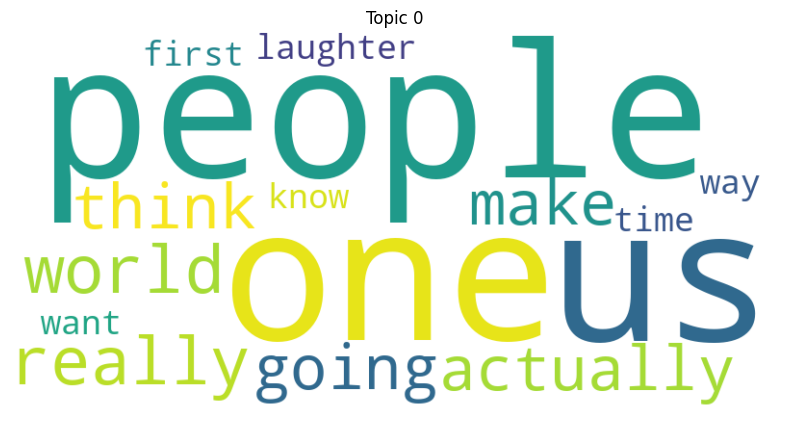

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


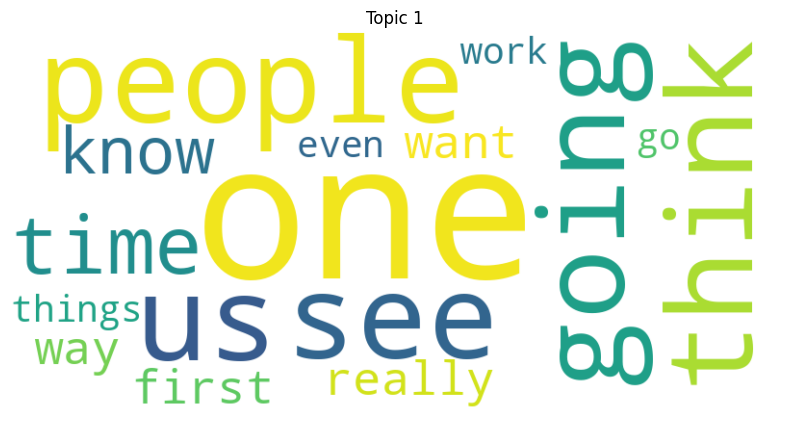

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


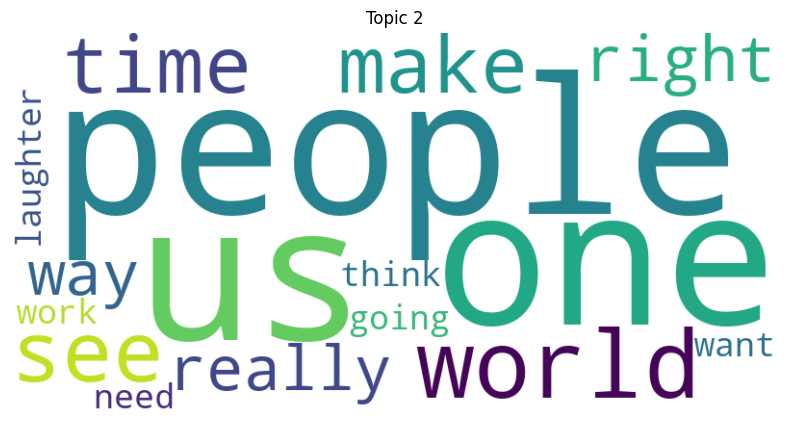

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


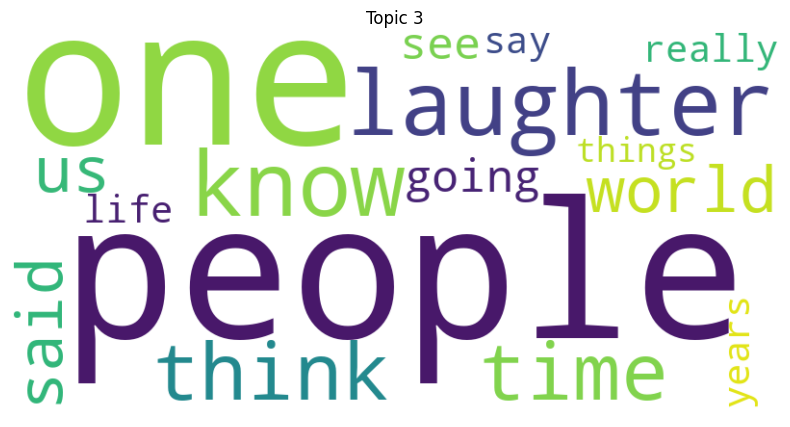

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


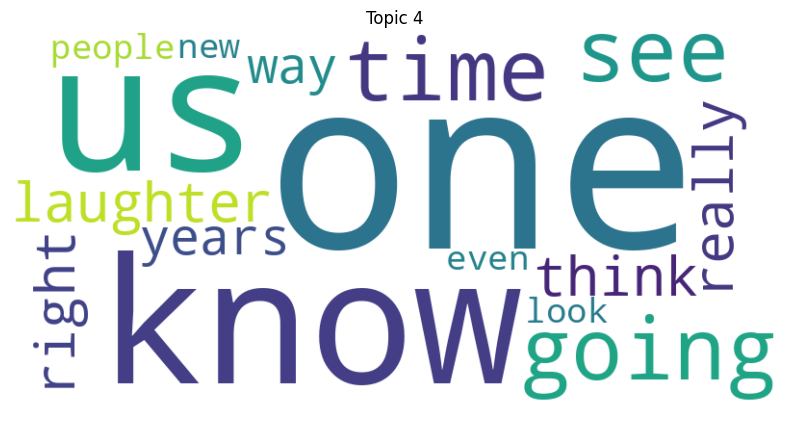

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create word clouds for each LDA topic
def plot_word_clouds(lda_model, feature_names, num_topics):
    for topic_idx in range(num_topics):
        topic_words = lda_model.show_topic(topic_idx, topn=20)
        top_words = [word for word, _ in topic_words]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Call the function to create word clouds for LDA topics
plot_word_clouds(lda_model, feature_names, num_topics_lda)



In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim

# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the datasets (if you haven't already) using the method we discussed earlier
# ... (loading and preprocessing steps)

# Assuming the 'processed_text' column already exists in transcripts_df

# Create a Gensim Dictionary and Corpus
all_words = [word for doc in transcripts_df['processed_text'] for word in doc]
dictionary = Dictionary([all_words])
corpus = [dictionary.doc2bow(doc) for doc in transcripts_df['processed_text']]

# Perform LDA using Gensim
num_topics_lda = 5  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics_lda, random_state=42)

# Visualize the LDA results with pyLDAvis
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#LSA

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the processed text into a document-term matrix using TF-IDF
vectorizer = TfidfVectorizer()
dtm_tfidf = vectorizer.fit_transform(transcripts_df['processed_text'].apply(lambda x: ' '.join(x)))

# Create a mapping of feature indices to words (vocabulary)
feature_names = vectorizer.get_feature_names_out()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from sklearn.decomposition import TruncatedSVD

# Perform LSA
num_topics_lsa = 5  # You can adjust the number of topics as needed
lsa_model = TruncatedSVD(n_components=num_topics_lsa, random_state=42)
lsa_topics = lsa_model.fit_transform(dtm_tfidf)

# Print the top words for each topic in LSA
for topic_idx, topic in enumerate(lsa_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: people one like going know think laughter would really get
Topic 1: women men people said girls school children woman country family
Topic 2: music laughter applause said like know love play sound video
Topic 3: music applause cities world city countries china africa climate water
Topic 4: music brain cancer cells women patients disease health applause cell


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


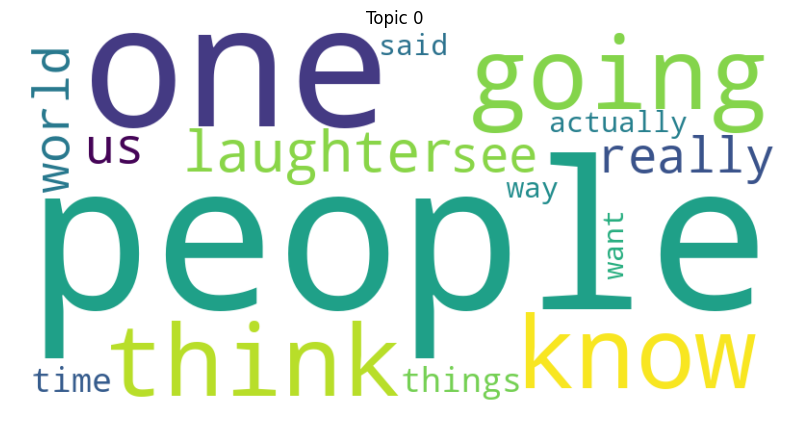

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


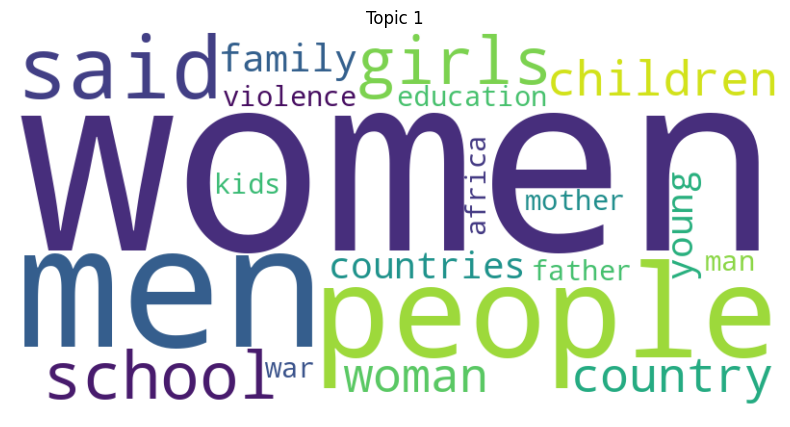

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


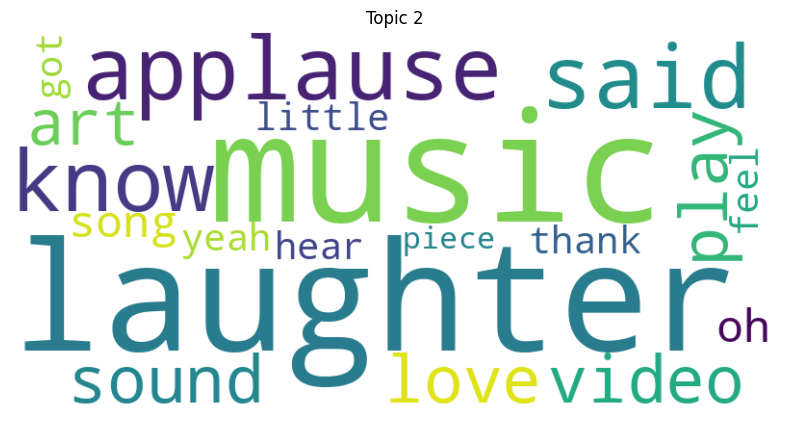

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


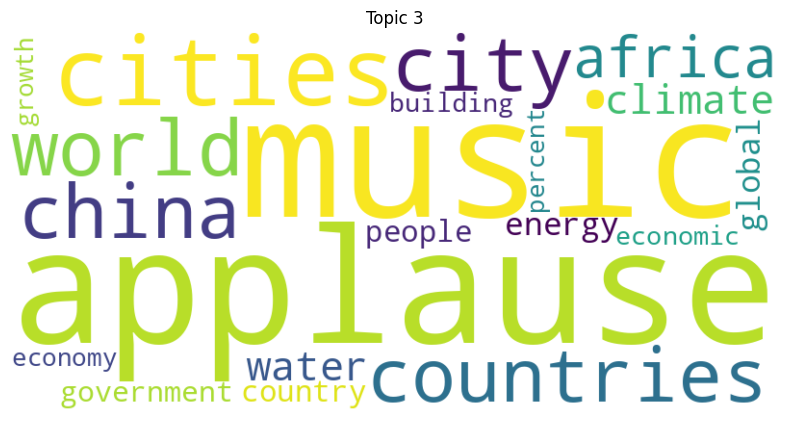

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


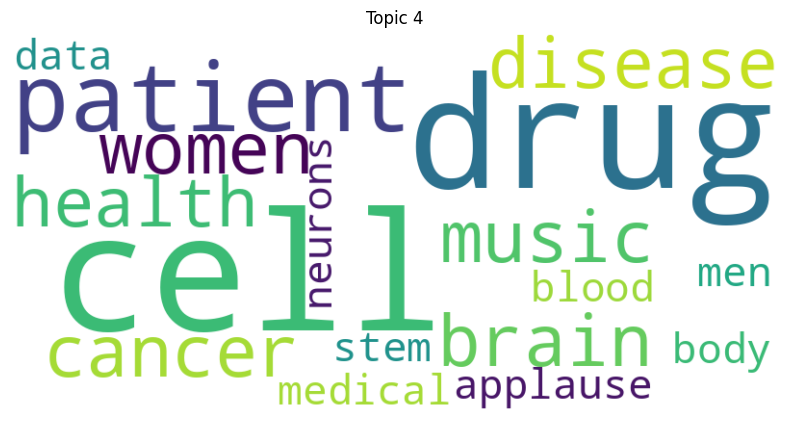

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to plot word clouds for each LSA topic
def plot_word_clouds(lsa_model, feature_names, num_topics):
    for topic_idx, topic in enumerate(lsa_model.components_):
        top_words_idx = topic.argsort()[-20:][::-1]  # Show top 20 words for each topic
        top_words = [feature_names[idx] for idx in top_words_idx]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Call the function to plot word clouds
plot_word_clouds(lsa_model, feature_names, num_topics_lsa)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


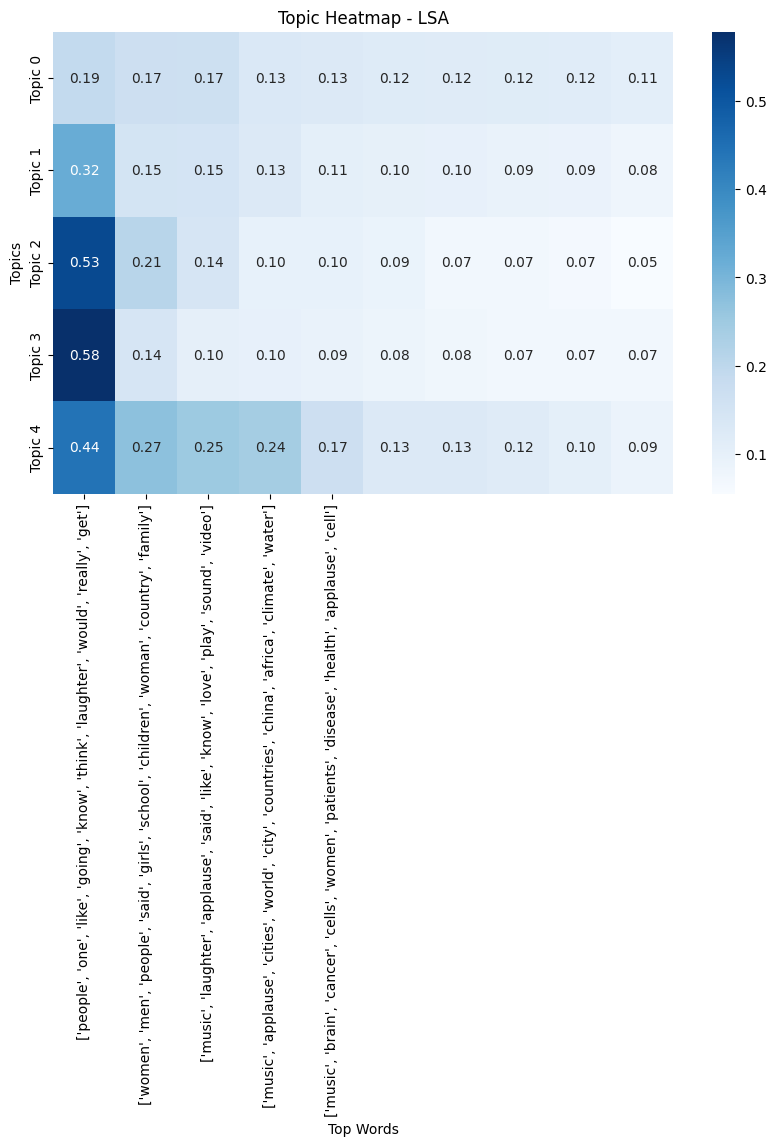

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create topic heatmaps
def plot_topic_heatmaps(lsa_model, feature_names, num_topics):
    # Get the top words for each topic and their weights
    topic_words = []
    topic_weights = []
    for topic_idx, topic in enumerate(lsa_model.components_):
        top_words_idx = topic.argsort()[-10:][::-1]  # Show top 10 words for each topic
        top_words = [feature_names[idx] for idx in top_words_idx]
        topic_words.append(top_words)
        topic_weights.append(topic[top_words_idx])

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(np.array(topic_weights), cmap='Blues', annot=True, fmt=".2f", xticklabels=topic_words, yticklabels=['Topic ' + str(i) for i in range(num_topics)])
    plt.xlabel('Top Words')
    plt.ylabel('Topics')
    plt.title('Topic Heatmap - LSA')
    plt.show()

# Call the function to create topic heatmaps
plot_topic_heatmaps(lsa_model, feature_names, num_topics_lsa)
